Quantitative Assessment of Stock Price Prediction Models

# Collect data

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [43]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400,AMAZON
2024-02-23,174.279999,175.750000,173.699997,174.990005,174.990005,59715200,AMAZON
2024-02-26,175.699997,176.369995,174.259995,174.729996,174.729996,44368600,AMAZON
2024-02-27,174.080002,174.619995,172.860001,173.539993,173.539993,31141700,AMAZON
2024-02-28,172.440002,174.050003,172.270004,173.160004,173.160004,28180500,AMAZON
2024-02-29,173.009995,177.220001,172.850006,176.759995,176.759995,53805400,AMAZON
2024-03-01,176.750000,178.729996,176.070007,178.220001,178.220001,31956200,AMAZON
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON


In [44]:
# Read the Excel file into a DataFrame
df = pd.read_excel('tech_stock_data_2019.xlsx')

In [45]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
5023,174.800003,175.389999,171.539993,172.339996,172.339996,51050400,AMZN
5024,167.729996,170.949997,165.750000,168.639999,168.639999,56345100,AMZN
5025,169.210007,171.210007,168.279999,170.979996,170.979996,42815500,AMZN
5026,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,AMZN
5027,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,AMZN
5028,167.830002,168.710007,165.740005,167.080002,167.080002,41980300,AMZN
5029,168.940002,170.229996,167.139999,168.589996,168.589996,44575600,AMZN
5030,173.100006,174.800003,171.770004,174.580002,174.580002,55392400,AMZN
5031,174.279999,175.750000,173.699997,174.990005,174.990005,59662900,AMZN
5032,175.699997,176.369995,174.259995,174.729996,174.729996,44368600,AMZN


## Check the size of the spreadsheet

In [5]:
# Check the Index
print(df.index)

# Check Time Differences
time_differences = df.index[1:] - df.index[:-1]

RangeIndex(start=0, stop=5033, step=1)


In [6]:
time_differences

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=5032)

# Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [7]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,127.931506,129.377212,126.582214,128.054034,126.489557,9.917630e+07
std,45.203300,45.569438,44.821468,45.212978,45.516990,5.205494e+07
min,42.580002,43.267502,42.375000,43.125000,41.516396,2.404830e+07
25%,81.151876,81.923126,80.783752,81.675627,79.706373,6.544418e+07
50%,139.480003,141.845001,137.325005,139.105003,137.798729,8.664815e+07
75%,164.515003,166.335003,162.962498,165.032505,163.435188,1.160514e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08


## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [8]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2019-03-06 to 2024-03-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

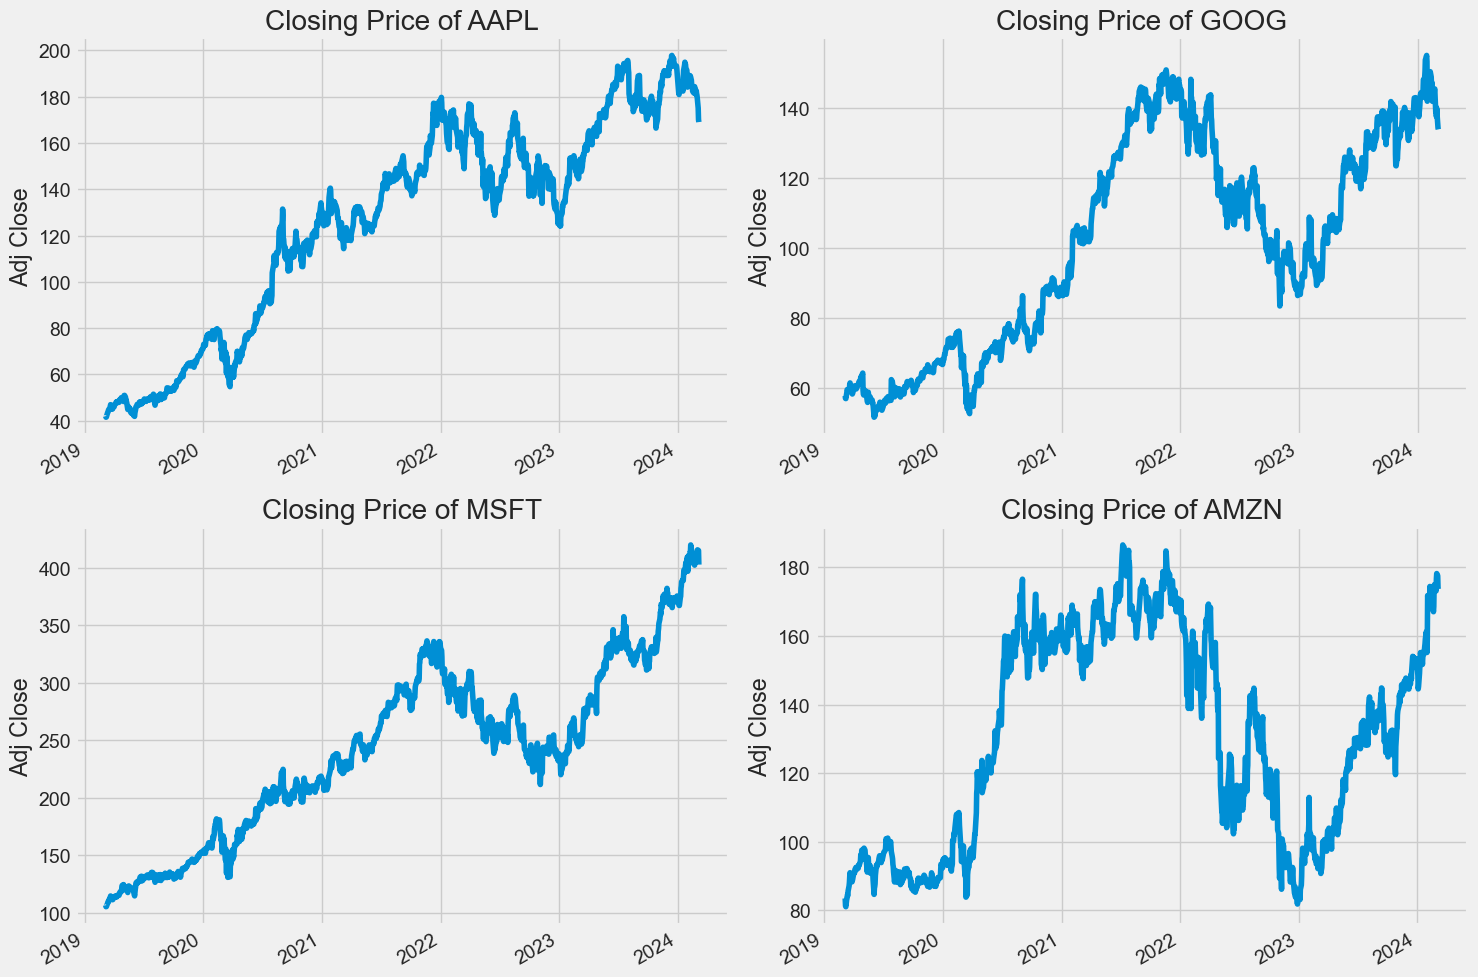

In [9]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

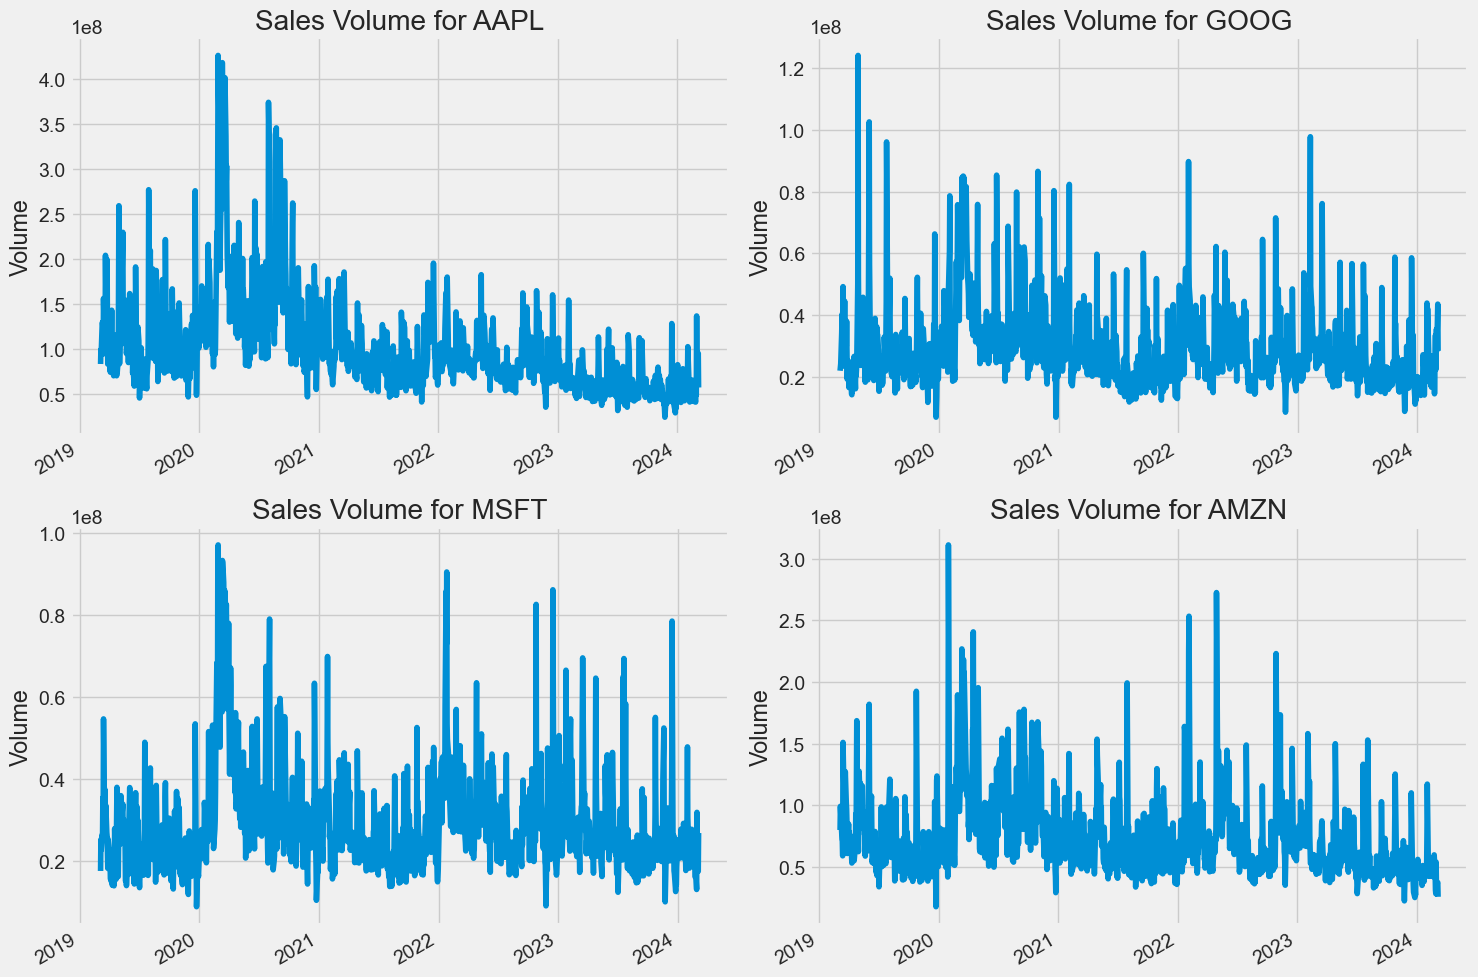

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Moving average

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

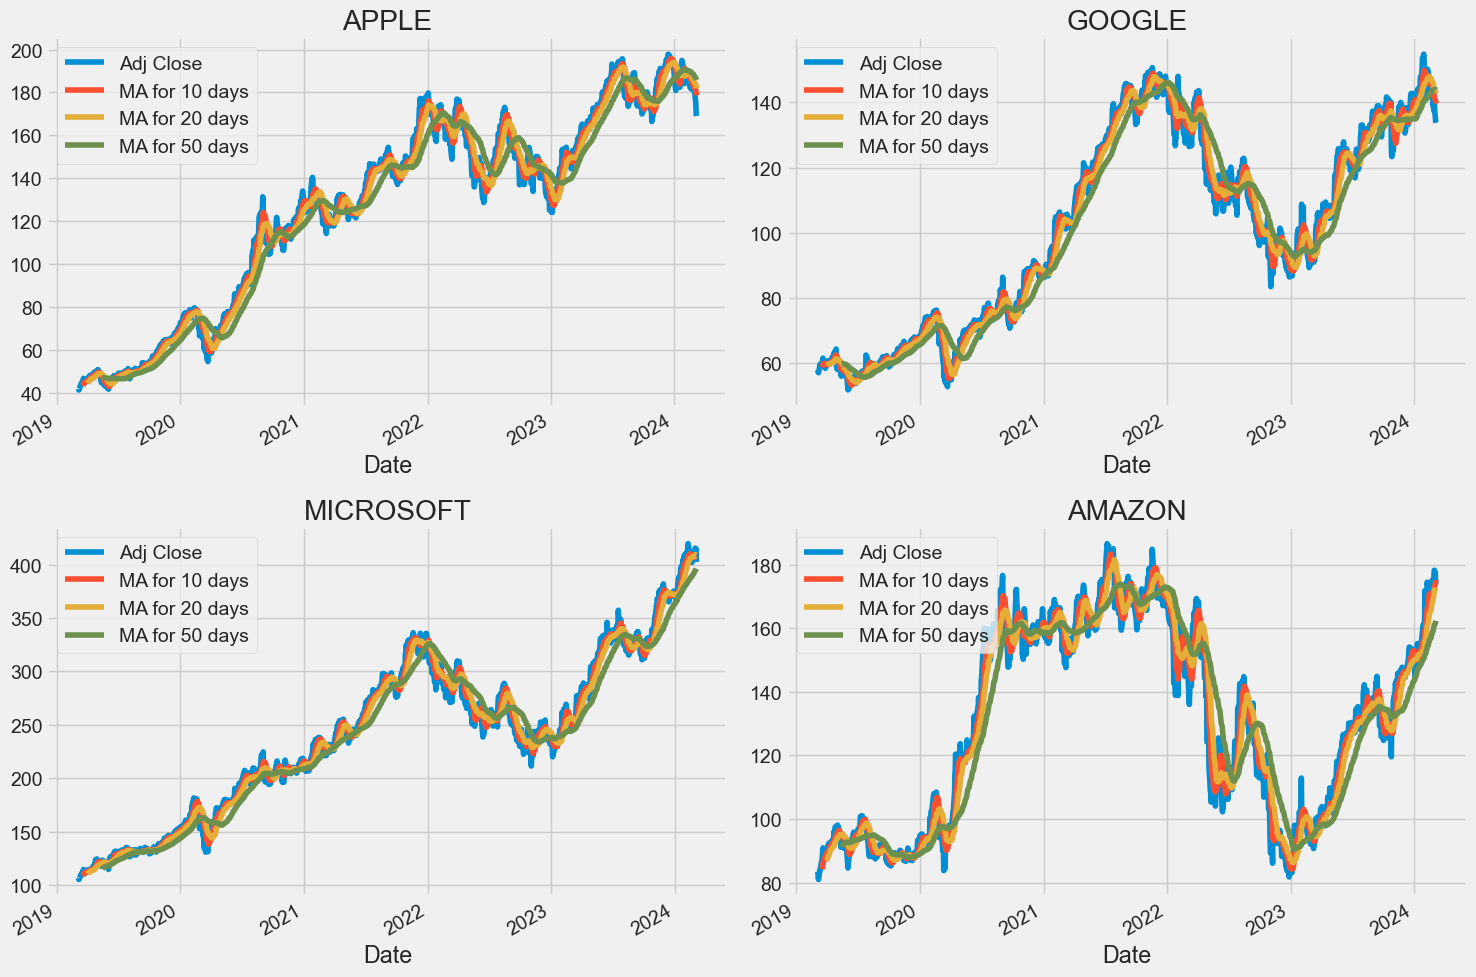

In [11]:
ma_day = [10, 20, 50] # number of days in the window

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# SARIMAX prediction the closing price stock price of APPLE inc:

In [49]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

# Save DataFrame to Excel
df.to_excel('df_2012.xlsx')

[*********************100%%**********************]  1 of 1 completed


In [50]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2021-01-01', end=datetime.now())
# Show teh data
df

# Save DataFrame to Excel
df.to_excel('df_2021.xlsx')

[*********************100%%**********************]  1 of 1 completed


In [34]:
df_2012 = pd.read_excel('df_2012.xlsx')

len(df_2012)

3054

In [16]:
df_2021 = pd.read_excel('df_2021.xlsx')

len(df_2021)

784

## start at 2012

### seasonal_order=(1, 1, 1, 6).fit(maxiter=200)

In [22]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming df_2012 is your DataFrame with 'MA for 10 days'
data = df_2012[['Adj Close']].dropna() ## fix this 

cv = TimeSeriesSplit(5, test_size=12)
mses = np.zeros(5)
training_times = []  # List to store training times

# Iterate over CV splits
for i, (train_index, test_index) in enumerate(cv.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Record the start time
    start_time = time.time()

    # SARIMA model
    #sarima = sm.tsa.SARIMAX(train_data['MA for 10 days'],
    #                        order=(1, 0, 1),
    #                       seasonal_order=(1, 1, 1, 12)).fit(maxiter=200)

    sarima = sm.tsa.SARIMAX(train_data['MA for 10 days'],
                        order=(1, 0, 1),
                        seasonal_order=(1, 1, 1, 6)).fit(maxiter=200)

    # Record the end time
    end_time = time.time()

    # Append the training time
    training_times.append(end_time - start_time)

    # Forecast for the test set
    forecast = sarima.forecast(steps=len(test_data))

    # Calculate MSE directly (without square root)
    mse = mean_squared_error(test_data['MA for 10 days'], forecast)
    mses[i] = mse

# Print average MSE and average training time
print(f"Average MSE: {np.mean(mses)}")
print(f"Average Training Time: {np.mean(training_times)} seconds")

c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-pa

Average MSE: 22.715404292965626
Average Training Time: 4.367883348464966 seconds


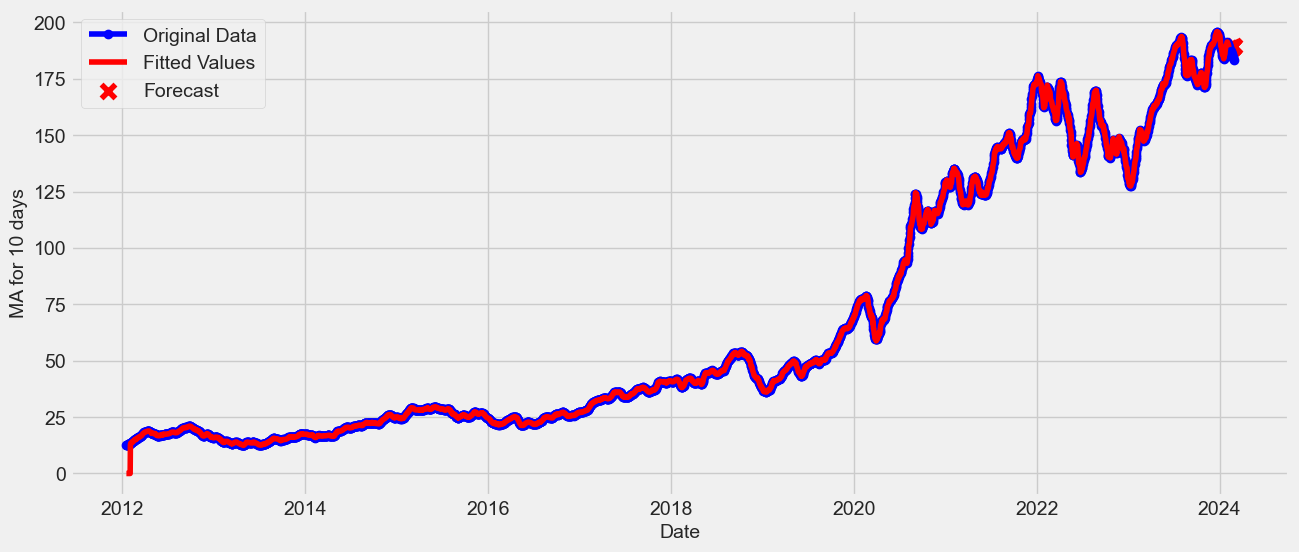

In [72]:
# Plotting
plt.figure(figsize=(14, 6))

plt.plot(data.index, data['MA for 10 days'], 'b-o', label='Original Data')
plt.plot(train_data.index, sarima.fittedvalues, 'r', label='Fitted Values')
plt.scatter(test_data.index, forecast, c='r', marker='x', s=100, label="Forecast")

plt.legend(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("MA for 10 days", fontsize=14)
plt.show()

### seasonal_order=(1, 1, 1, 12)

In [23]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming df_2012 is your DataFrame with 'MA for 10 days'
data = df_2012[['Adj Close']].dropna()

cv = TimeSeriesSplit(5, test_size=12)
mses = np.zeros(5)
training_times = []  # List to store training times

# Iterate over CV splits
for i, (train_index, test_index) in enumerate(cv.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Record the start time
    start_time = time.time()

    # SARIMA model
    sarima = sm.tsa.SARIMAX(train_data['MA for 10 days'],
                           order=(1, 0, 1),
                          seasonal_order=(1, 1, 1, 12)).fit(maxiter=200)


    # Record the end time
    end_time = time.time()

    # Append the training time
    training_times.append(end_time - start_time)

    # Forecast for the test set
    forecast = sarima.forecast(steps=len(test_data))

    # Calculate MSE directly (without square root)
    mse = mean_squared_error(test_data['MA for 10 days'], forecast)
    mses[i] = mse

# Print average MSE and average training time
print(f"Average MSE: {np.mean(mses)}")
print(f"Average Training Time: {np.mean(training_times)} seconds")

c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-pa

Average MSE: 20.108643476325792
Average Training Time: 14.559979391098022 seconds


## start at 2021 

In [ ]:
# Assuming the file is in the same directory as your script
file_path = 'df_2021.csv'

# Read the CSV file
df_2021 = pd.read_csv(file_path)

In [84]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming df_2012 is your DataFrame with 'MA for 10 days'
data = df_2021[['Adj Close']].dropna()

cv = TimeSeriesSplit(5, test_size=12)
mses = np.zeros(5)
training_times = []  # List to store training times

# Iterate over CV splits
for i, (train_index, test_index) in enumerate(cv.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Record the start time
    start_time = time.time()

    # SARIMA model
    sarima = sm.tsa.SARIMAX(train_data['MA for 10 days'],
                            order=(1, 0, 1),
                            seasonal_order=(1, 1, 1, 12)).fit(maxiter=200)

    # Record the end time
    end_time = time.time()

    # Append the training time
    training_times.append(end_time - start_time)

    # Forecast for the test set
    forecast = sarima.forecast(steps=len(test_data))

    # Calculate MSE directly (without square root)
    mse = mean_squared_error(test_data['MA for 10 days'], forecast)
    mses[i] = mse

# Print average MSE and average training time
print(f"Average MSE: {np.mean(mses)}")
print(f"Average Training Time: {np.mean(training_times)} seconds")

c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\rwang\a

Average MSE: 6.962772551559761
Average Training Time: 3.842993688583374 seconds


c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


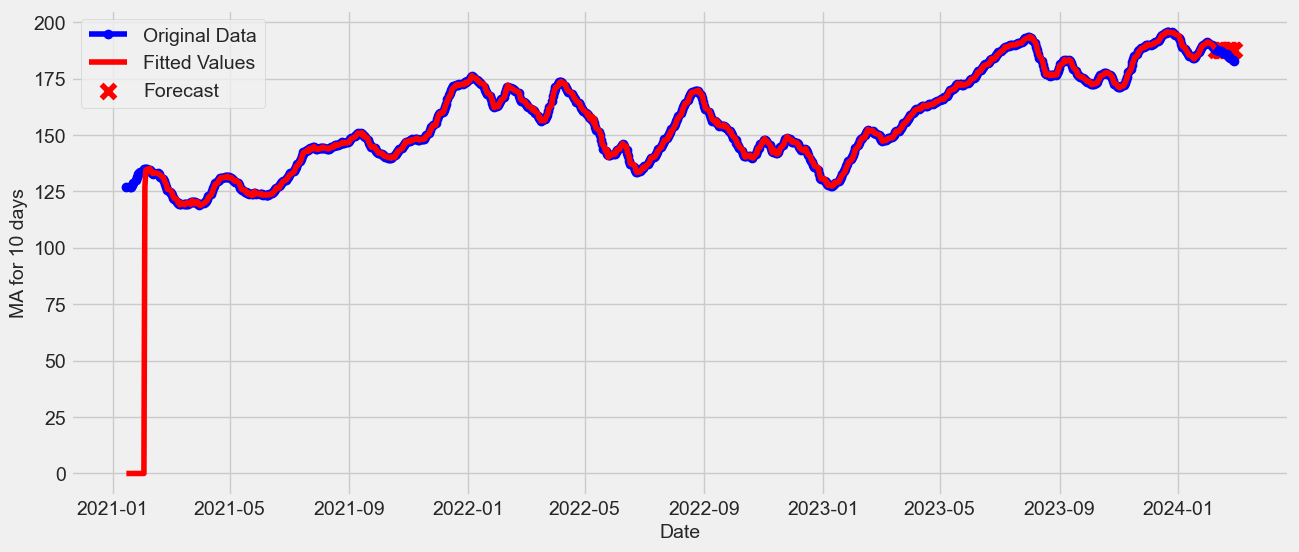

In [85]:
# Plotting
plt.figure(figsize=(14, 6))

plt.plot(data.index, data['MA for 10 days'], 'b-o', label='Original Data')
plt.plot(train_data.index, sarima.fittedvalues, 'r', label='Fitted Values')
plt.scatter(test_data.index, forecast, c='r', marker='x', s=100, label="Forecast")

plt.legend(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("MA for 10 days", fontsize=14)
plt.show()

# LSTM

## start from 2012

In [17]:
# Assuming the file is in the same directory as your script
file_path = 'df_2012.csv'

# Read the CSV file
df = pd.read_csv(file_path)

2989/2989 [==============================] - 68s 22ms/step - loss: 0.0013
Training Time: 67.8764 seconds
94/94 [==============================] - 3s 18ms/step
Training MSE: 2.3477


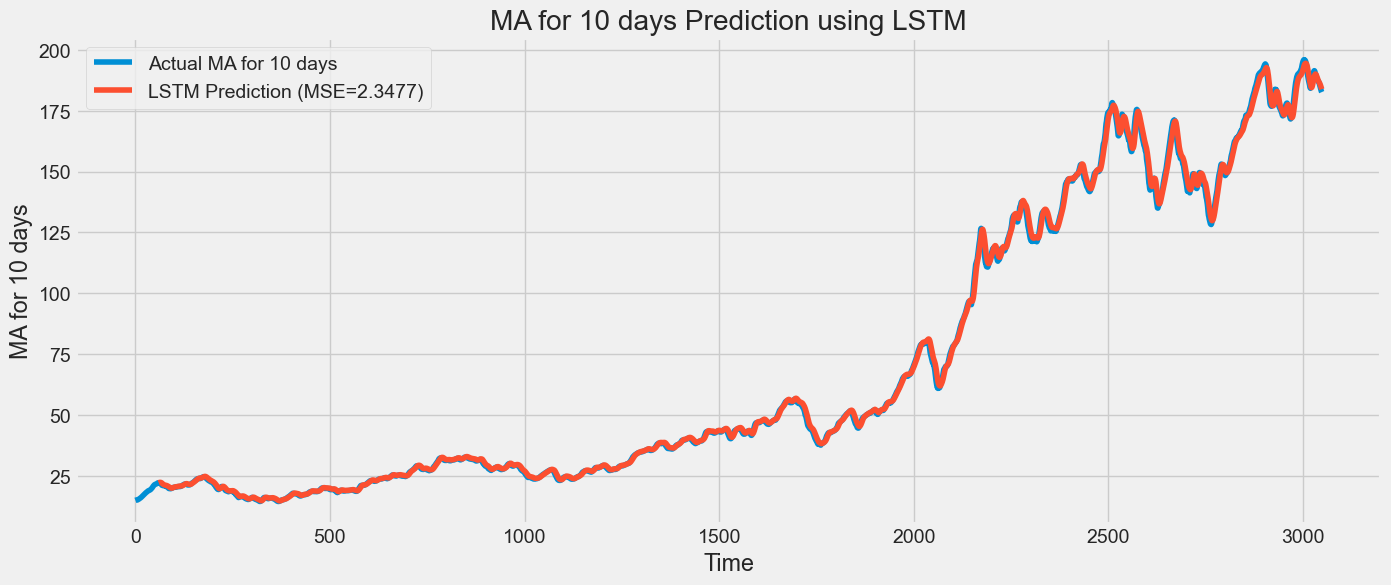

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import time


data = df_2012[['Adj Close']].dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data
look_back = 60  # number of previous time steps to use as input variables
X, Y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    Y.append(scaled_data[i, 0])

X, Y = np.array(X), np.array(Y)

# Reshape the data
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Record the start time
start_time = time.time()

# Train the model
model.fit(X, Y, batch_size=1, epochs=1)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Make predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
Y_inverse = scaler.inverse_transform([Y])

# Calculate MSE
train_mse = mean_squared_error(Y_inverse[0], train_predict[:, 0])
print(f"Training MSE: {train_mse:.4f}")

# Plotting the results
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

# Inverse transform the data for plotting
data_original = scaler.inverse_transform(scaled_data)

plt.figure(figsize=(15, 6))
plt.plot(data_original, label='Actual MA for 10 days')
plt.plot(train_predict_plot, label=f'LSTM Prediction (MSE={train_mse:.4f})')
plt.title('MA for 10 days Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('MA for 10 days')
plt.legend()
plt.show()

## start from 2021

In [30]:
data = df_2021[['Adj Close']].dropna()

2994/2994 [==============================] - 62s 20ms/step - loss: 0.0011
Training Time: 61.5780 seconds
94/94 [==============================] - 2s 15ms/step
Training MSE: 17.7076


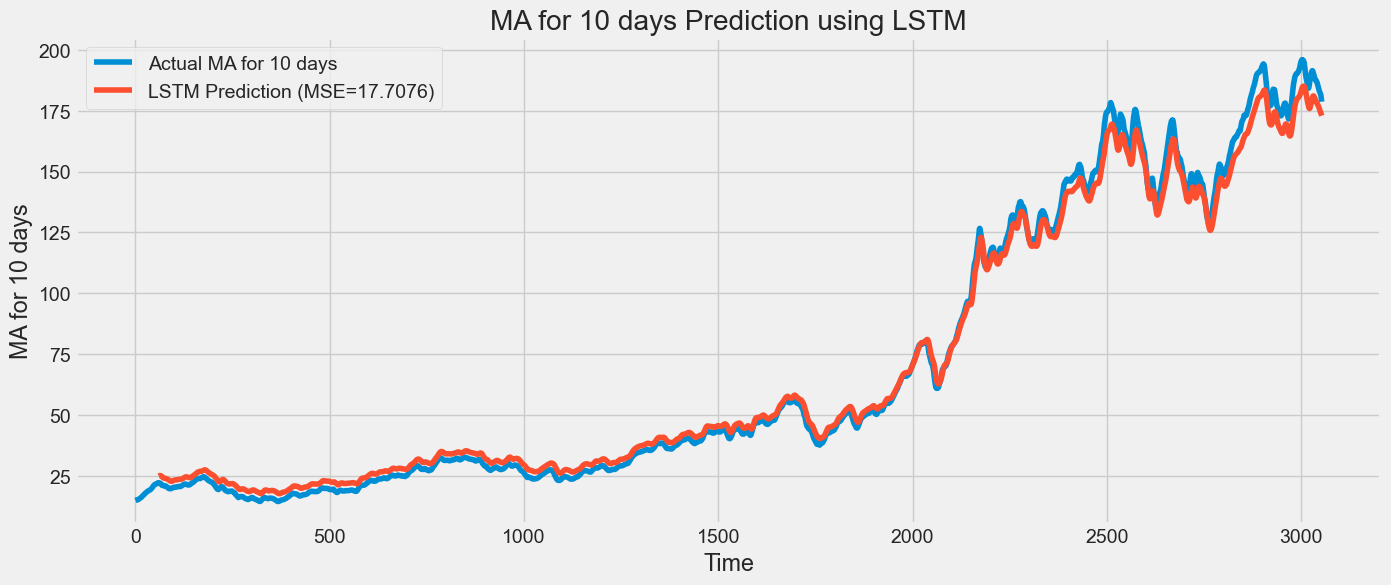

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import time


# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data
look_back = 60  # number of previous time steps to use as input variables
X, Y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    Y.append(scaled_data[i, 0])

X, Y = np.array(X), np.array(Y)

# Reshape the data
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Record the start time
start_time = time.time()

# Train the model
model.fit(X, Y, batch_size=1, epochs=1)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")

# Make predictions
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
Y_inverse = scaler.inverse_transform([Y])

# Calculate MSE
train_mse = mean_squared_error(Y_inverse[0], train_predict[:, 0])
print(f"Training MSE: {train_mse:.4f}")

# Plotting the results
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

# Inverse transform the data for plotting
data_original = scaler.inverse_transform(scaled_data)

plt.figure(figsize=(15, 6))
plt.plot(data_original, label='Actual MA for 10 days')
plt.plot(train_predict_plot, label=f'LSTM Prediction (MSE={train_mse:.4f})')
plt.title('MA for 10 days Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('MA for 10 days')
plt.legend()
plt.show()